## 1. Import data and modules

In [35]:
import sklearn as sk
import pandas as pd
import numpy as np
np.Inf = np.inf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import math

In [36]:
df = pd.read_csv('weatherClassificationData.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


## 2. Exploratory Data Analysis

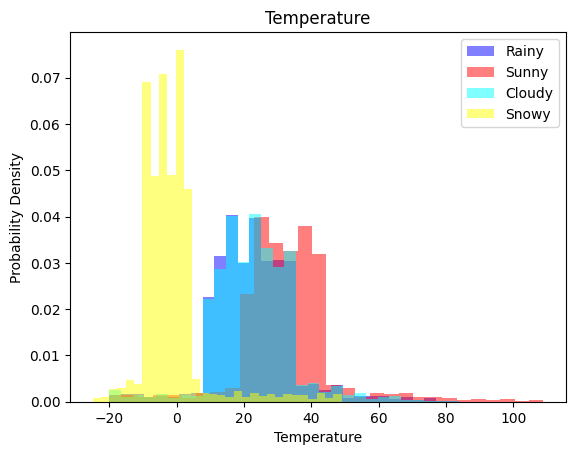

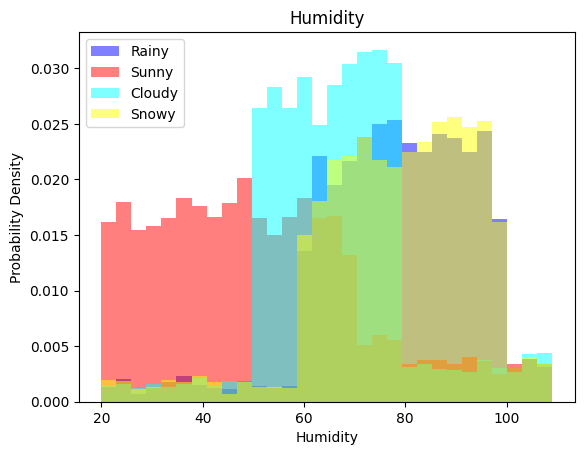

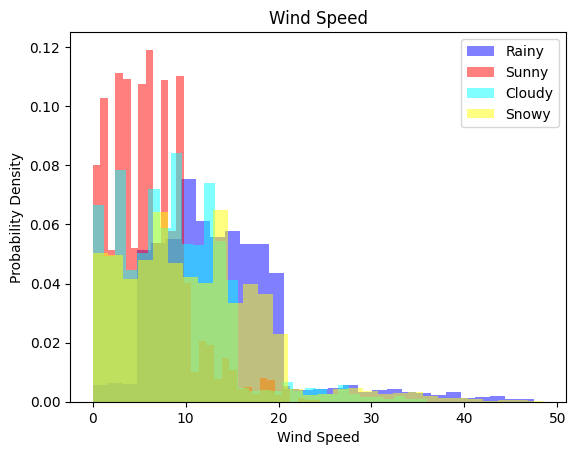

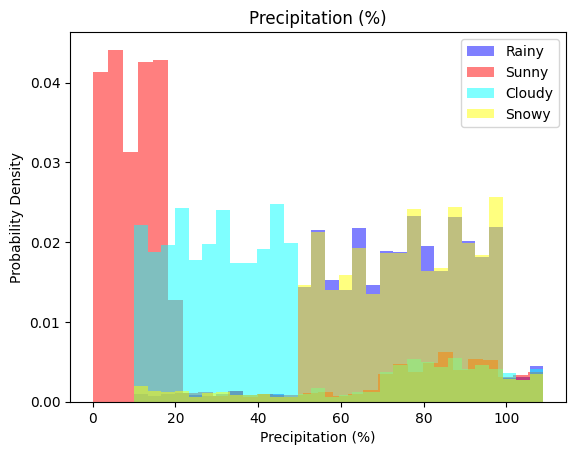

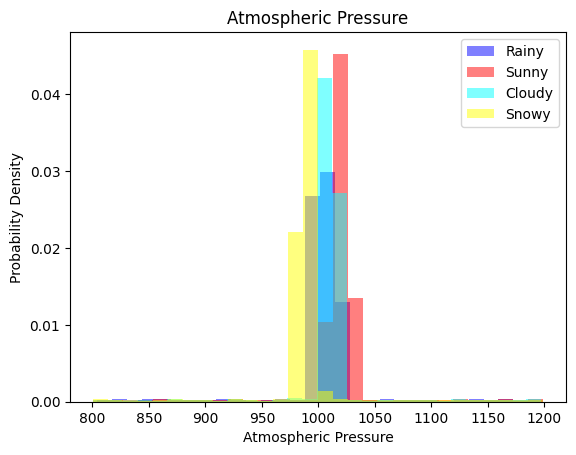

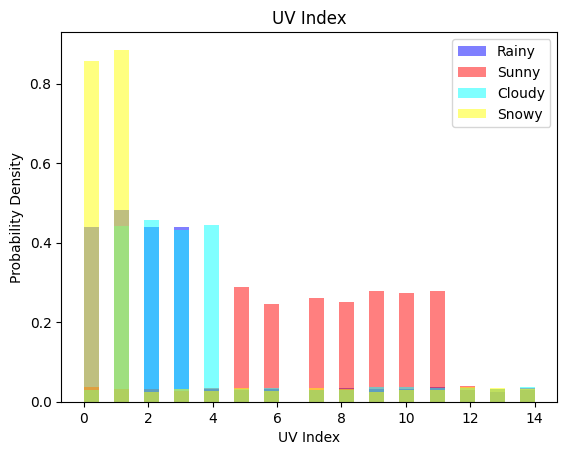

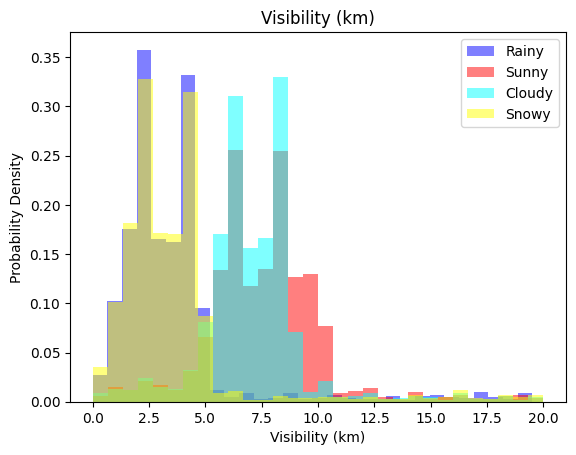

In [37]:
categories = df.select_dtypes(include='object')

for col in df.columns[:-1]:
  if col not in  categories[:-2]:
    plt.hist(df[df["Weather Type"]=="Rainy"][col], color='blue', label='Rainy', alpha=0.5, density=True, bins = 30)
    plt.hist(df[df["Weather Type"]=="Sunny"][col], color='red', label='Sunny', alpha=0.5, density=True, bins = 30)
    plt.hist(df[df["Weather Type"]=="Cloudy"][col], color='cyan', label='Cloudy', alpha=0.5, density=True, bins = 30)
    plt.hist(df[df["Weather Type"]=="Snowy"][col], color='yellow', label='Snowy', alpha=0.5, density=True, bins = 30)
    plt.title(col)
    plt.ylabel("Probability Density")
    plt.xlabel(col)
    plt.legend()
    plt.show()

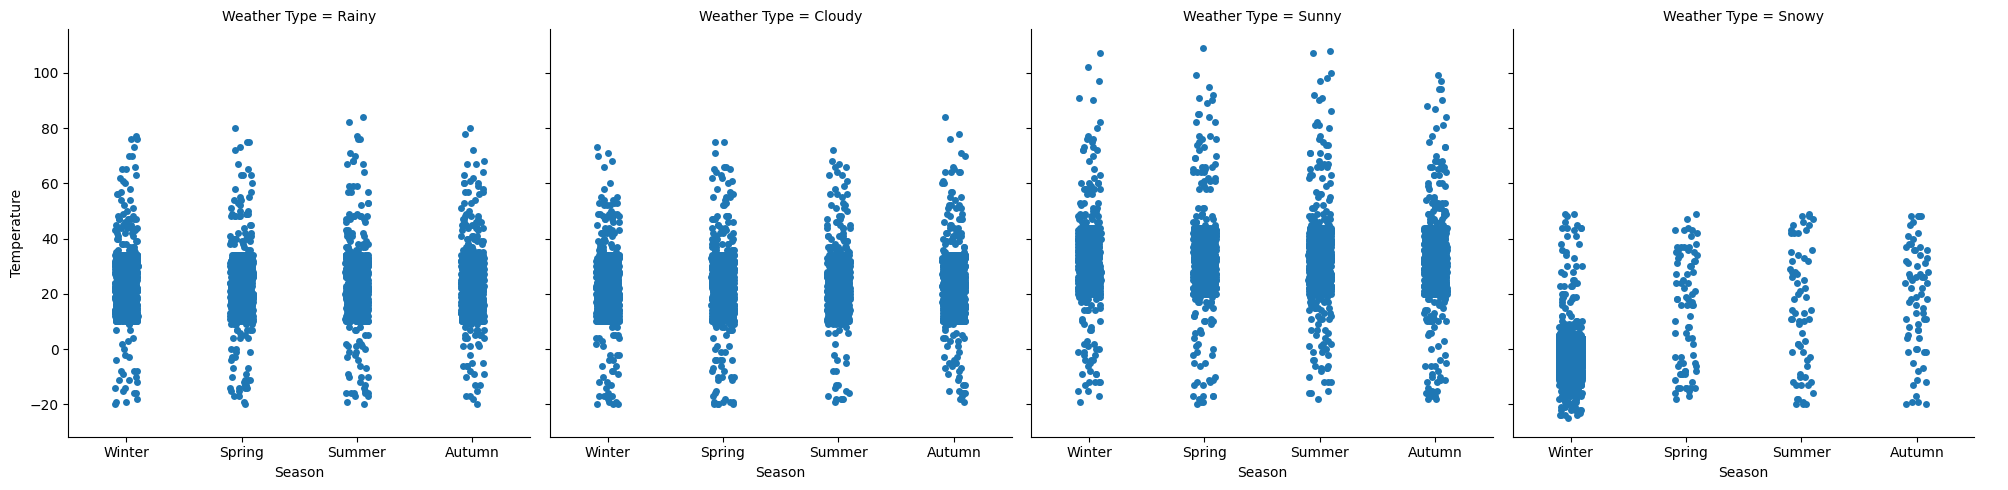

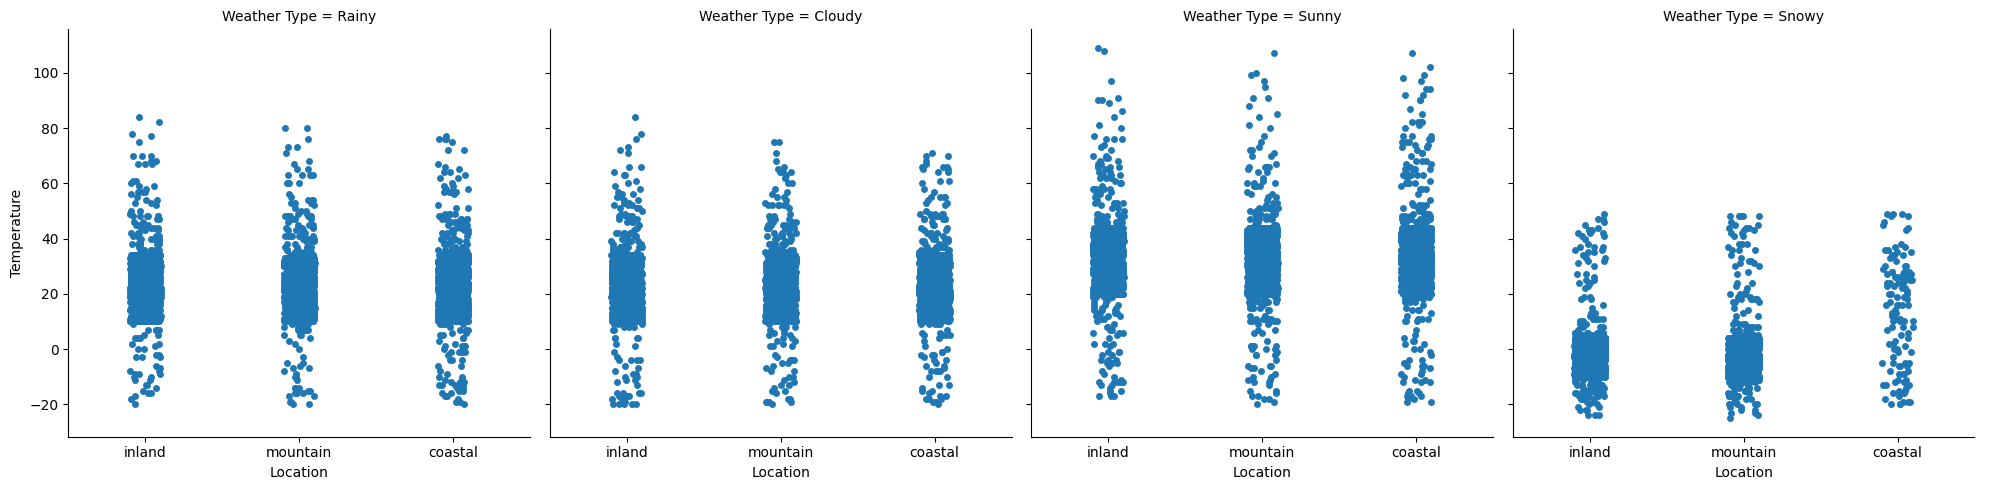

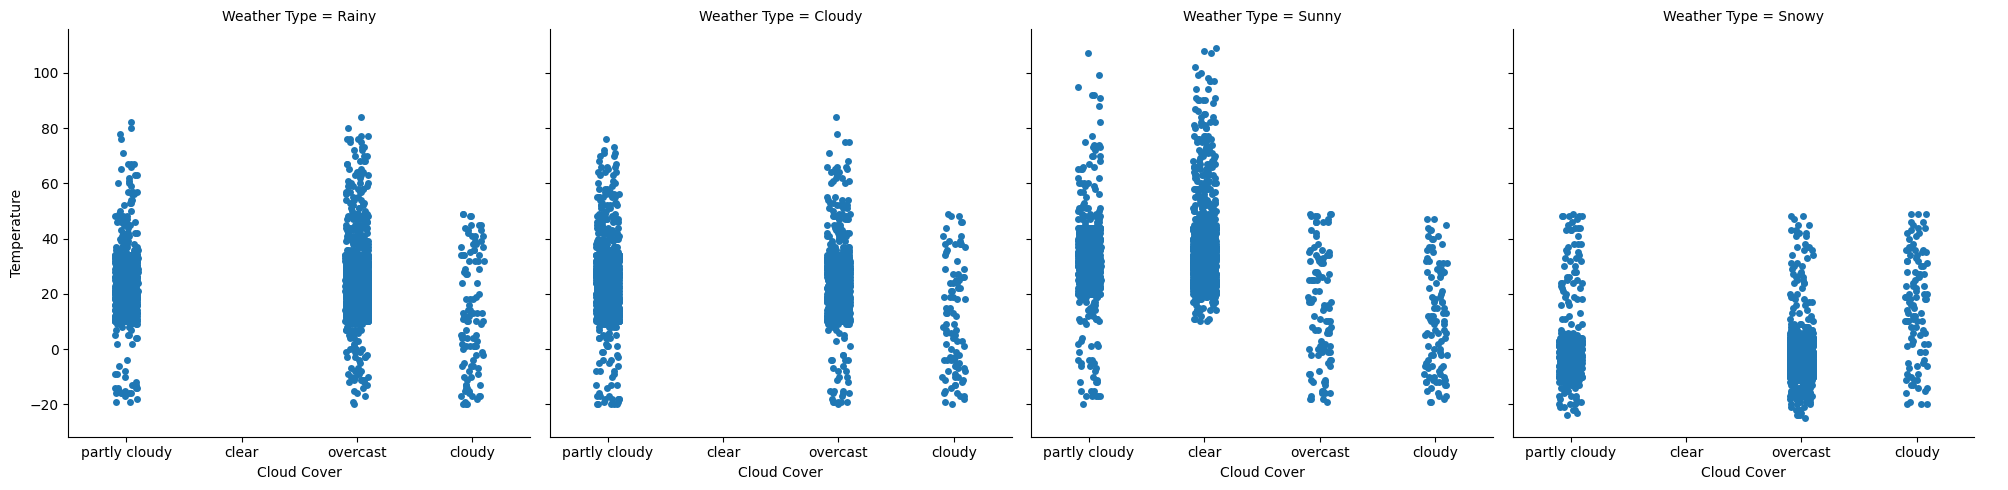

In [38]:
sns.catplot(data=df, x="Season", y="Temperature", col="Weather Type")
sns.catplot(data=df, x="Location", y="Temperature", col="Weather Type")
sns.catplot(data=df, x="Cloud Cover", y="Temperature", col="Weather Type")

### 2.1 Inferences
It is pretty apparent that snowy weather has lower temperature.\
Sunny weather usually means less humidity and more probably windy-ness.\
Sunny weather has lower precipitation, but rainy and snowy weather has higher precipitation.\
Snowy weather generally has lesser atmospheric pressure, but it's higher for sunny weather.\
Visibility is higher for sunny weather, but lower for rainy and snowy weather.

### 2.2 Correlation Matrix

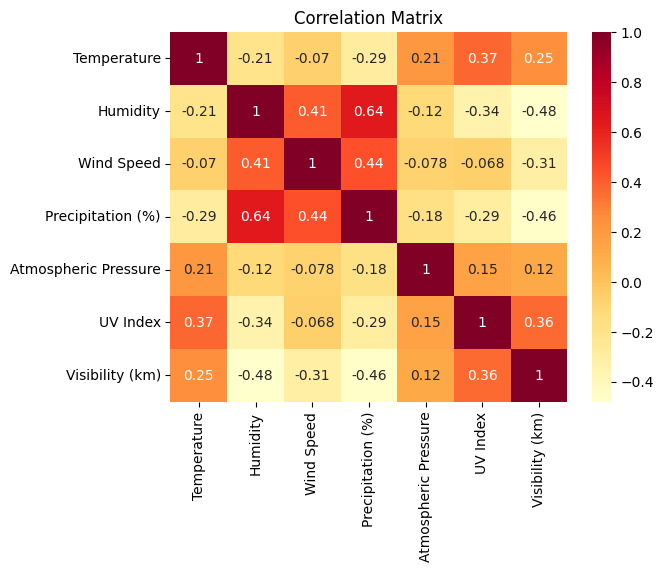

In [39]:
numerical_df = df.select_dtypes(include=["int", "float"])
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap ='YlOrRd')

plt.title('Correlation Matrix')
plt.show()

### 2.2.1 Inferences of the correlation matrix
We can see that humidity and precipitation have a high correlation.\
Also, wind speed and precipitation have a good correlation.

### 2.3 Feature Graphs

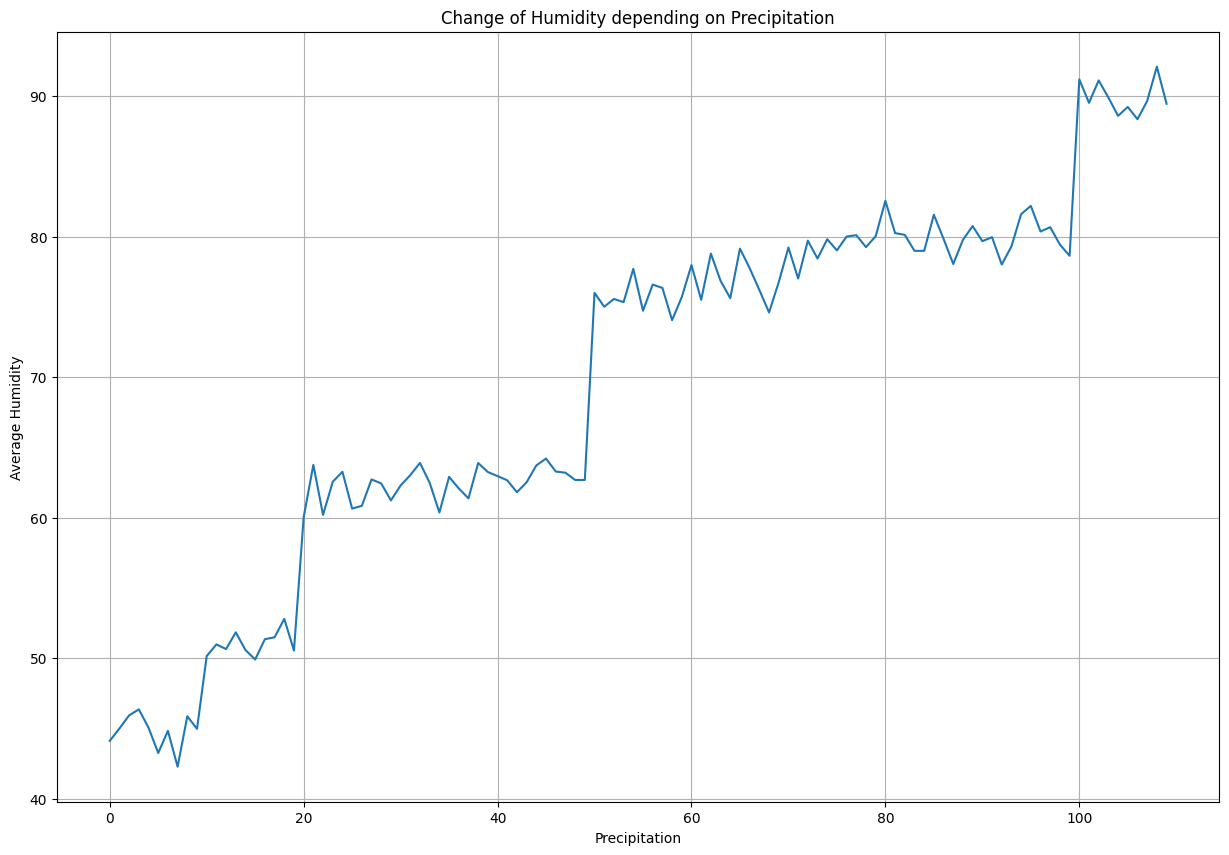

In [40]:
plt.figure(figsize=(15, 10))

precipitation_on_humidity = df.groupby("Precipitation (%)")["Humidity"].mean()

precipitation_on_humidity.plot(kind="line")

plt.title('Change of Humidity depending on Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Average Humidity')
plt.grid(True)

plt.show()

### 2.3.1 Inference from the Humidity/Precipitation graph
Generally it seems that higher average precipitation implies higher average humidity.

## 3.Data Preprocessing

In [41]:
print(df.duplicated().sum())

0


In [42]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


### 3.1 Outlier Detection

In [43]:
outlier_cols = ['Temperature', 'Humidity', 'Wind Speed', 
                'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for column in outlier_cols:
    df[column] = np.where(df[column] < lower_bound[column], lower_bound[column], df[column])
    df[column] = np.where(df[column] > upper_bound[column], upper_bound[column], df[column])

df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.050606,68.710833,9.624924,53.644394,1006.059214,4.005758,5.382292
std,17.108668,20.194248,6.214032,31.946541,17.158058,3.856600,3.105118
min,-25.000000,20.000000,0.000000,0.000000,961.841250,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,71.500000,109.000000,26.250000,109.000000,1049.731250,14.000000,14.250000


In [44]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()


for col in categories:
    df[col] = encoder.fit_transform(df[col])

df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73.0,9.5,82.0,3,1010.82,2.0,3,3.5,1,1
1,39.0,96.0,8.5,71.0,3,1011.43,7.0,1,10.0,1,0
2,30.0,64.0,7.0,16.0,0,1018.72,5.0,1,5.5,2,3
3,38.0,83.0,1.5,82.0,0,1026.25,7.0,1,1.0,0,3
4,27.0,74.0,17.0,66.0,2,990.67,1.0,3,2.5,2,1


In [45]:
def scaleDataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [46]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [47]:
train, X_train, y_train = scaleDataset(train, oversample=True)
valid, X_valid, y_valid = scaleDataset(valid)
test, X_test, y_test = scaleDataset(test)

## 4. Machine Learning Training

In [48]:
models = []
classificationReports = []

### 4.1 Naive Bayes' Model

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

gnb = classification_report(y_test, y_pred, digits=4)
models.append("Naive Bayes")
classificationReports.append(gnb)
print(gnb)

              precision    recall  f1-score   support

           0     0.8670    0.8171    0.8413       678
           1     0.8313    0.8601    0.8454       636
           2     0.9262    0.9389    0.9325       655
           3     0.8601    0.8703    0.8652       671

    accuracy                         0.8712      2640
   macro avg     0.8711    0.8716    0.8711      2640
weighted avg     0.8713    0.8712    0.8710      2640



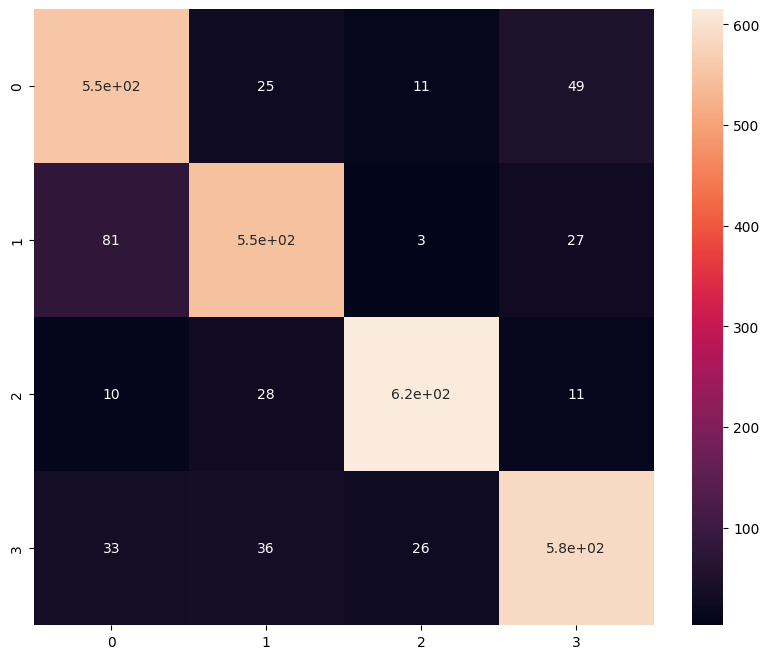

In [51]:
plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

### 4.2 Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)

lr = classification_report(y_test, y_pred, digits=4)
models.append("Logistic Regression")
classificationReports.append(lr)
print(lr)

              precision    recall  f1-score   support

           0     0.8245    0.8451    0.8347       678
           1     0.8505    0.8585    0.8545       636
           2     0.8889    0.9405    0.9139       655
           3     0.8803    0.8003    0.8384       671

    accuracy                         0.8606      2640
   macro avg     0.8610    0.8611    0.8604      2640
weighted avg     0.8609    0.8606    0.8601      2640



### 4.3 Support Vector Machines

In [54]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)

svm = classification_report(y_test, y_pred, digits=4)
models.append("Support Vector Machine")
classificationReports.append(svm)
print(svm)

              precision    recall  f1-score   support

           0     0.9127    0.9100    0.9114       678
           1     0.9044    0.9072    0.9058       636
           2     0.9131    0.9466    0.9295       655
           3     0.9382    0.9046    0.9211       671

    accuracy                         0.9170      2640
   macro avg     0.9171    0.9171    0.9170      2640
weighted avg     0.9173    0.9170    0.9170      2640



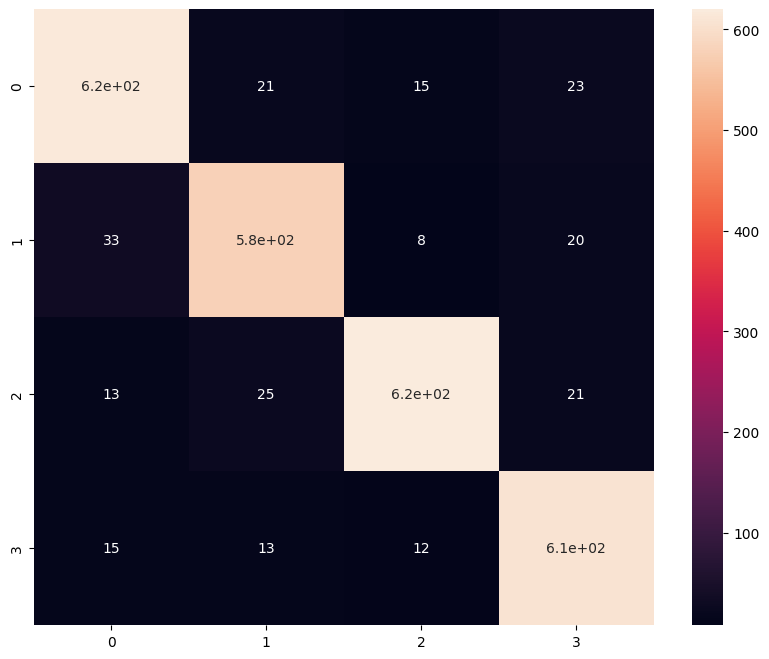

In [55]:
plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

### 4.4 Decision Trees

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

dt = classification_report(y_test, y_pred, digits=4)
models.append("Decision Tree")
classificationReports.append(dt)
print(dt)

              precision    recall  f1-score   support

           0     0.8972    0.8879    0.8925       678
           1     0.9063    0.8821    0.8940       636
           2     0.9179    0.9389    0.9283       655
           3     0.8956    0.9076    0.9016       671

    accuracy                         0.9042      2640
   macro avg     0.9042    0.9041    0.9041      2640
weighted avg     0.9041    0.9042    0.9041      2640



### 4.5 XGBoost

In [58]:
import xgboost as xgb

In [59]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

xgb = classification_report(y_test, y_pred, digits=4)
models.append("XGBoost")
classificationReports.append(xgb)
print(xgb)

              precision    recall  f1-score   support

           0     0.9209    0.9100    0.9154       678
           1     0.9201    0.9057    0.9128       636
           2     0.9565    0.9389    0.9476       655
           3     0.8873    0.9270    0.9067       671

    accuracy                         0.9205      2640
   macro avg     0.9212    0.9204    0.9206      2640
weighted avg     0.9210    0.9205    0.9206      2640



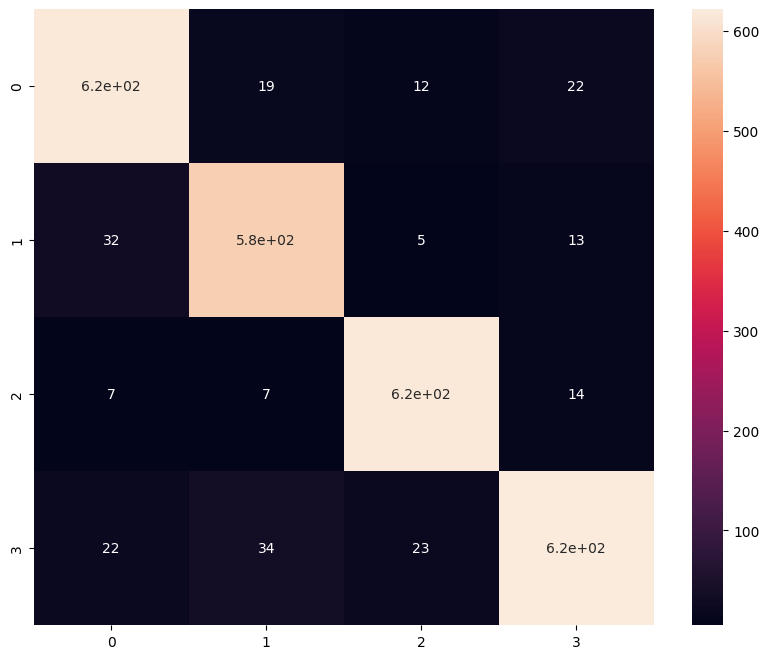

In [60]:
plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

### 4.6 Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

rf = classification_report(y_test, y_pred, digits=4)
models.append("Random Forest Classifier")
classificationReports.append(rf)
print(rf)

              precision    recall  f1-score   support

           0     0.8821    0.9159    0.8987       678
           1     0.9107    0.9135    0.9121       636
           2     0.9320    0.9420    0.9370       655
           3     0.9481    0.8987    0.9227       671

    accuracy                         0.9174      2640
   macro avg     0.9182    0.9175    0.9176      2640
weighted avg     0.9181    0.9174    0.9175      2640



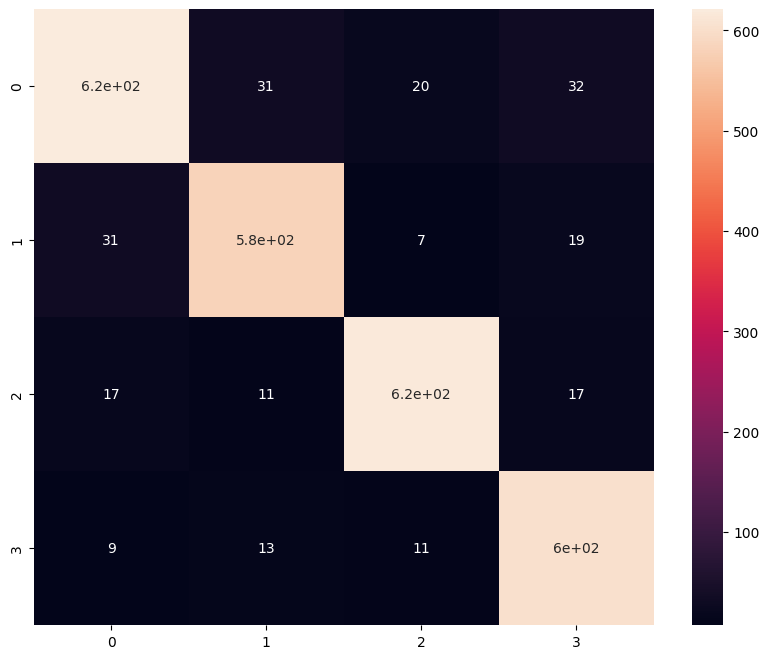

In [63]:
plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

### 4.7 Neural Networks

In [64]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical 

In [65]:
y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid,4)

In [66]:
def plotHistory(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  plt.title('Loss Over Epochs')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss over Epochs')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.title('Accuracy Over Epochs')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [67]:
def trainModel(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = Sequential([
      Dense(num_nodes, activation='relu', input_shape=(X_train.shape[1],)),
      Dropout(dropout_prob),
      Dense(num_nodes, activation='relu'),
      Dropout(dropout_prob),
      Dense(4, activation='softmax')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='CategoricalCrossentropy',
                  metrics=['accuracy'])
  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0,
  callbacks = [early_stopping,reduce_lr])

  return nn_model, history

128 nodes, dropout 0, lr 0.01, batch size 32


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


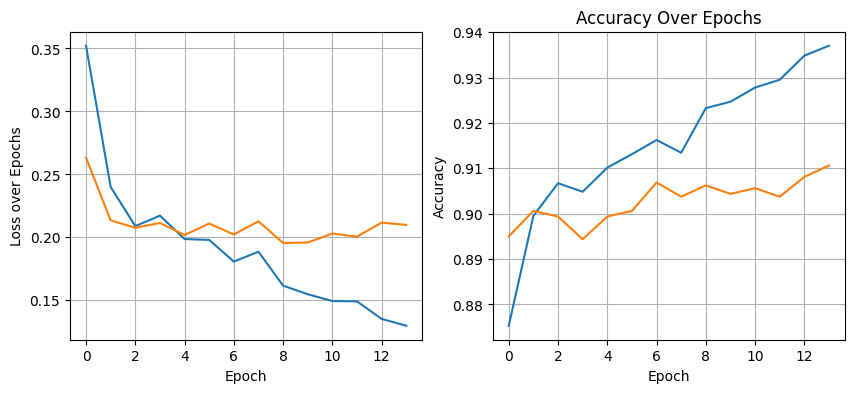

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9156 - loss: 0.1833
128 nodes, dropout 0, lr 0.01, batch size 64


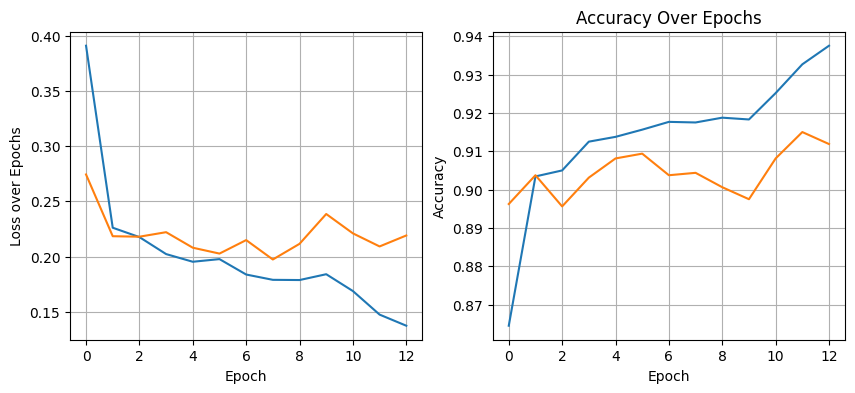

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9087 - loss: 0.1751
128 nodes, dropout 0, lr 0.01, batch size 128


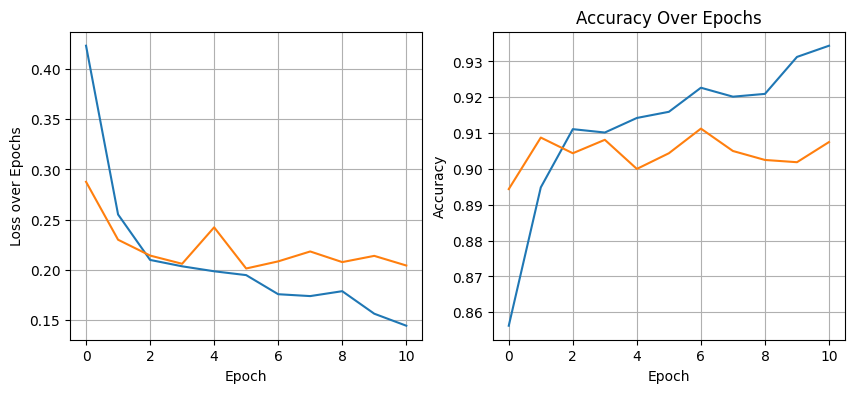

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.9150 - loss: 0.1765
128 nodes, dropout 0, lr 0.005, batch size 32


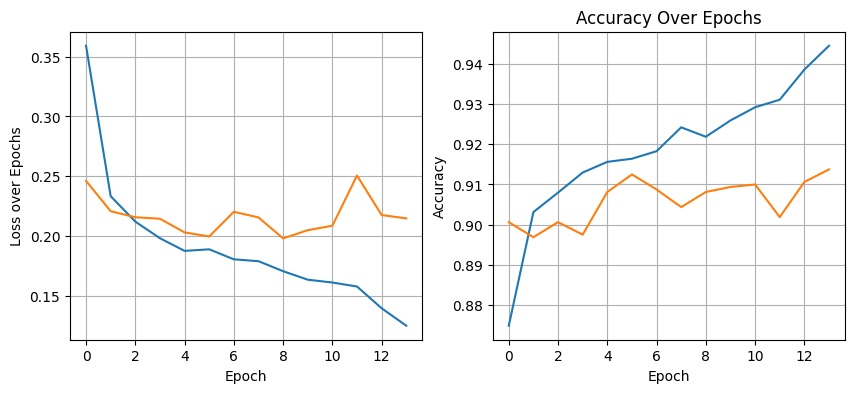

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.9150 - loss: 0.1841
128 nodes, dropout 0, lr 0.005, batch size 64


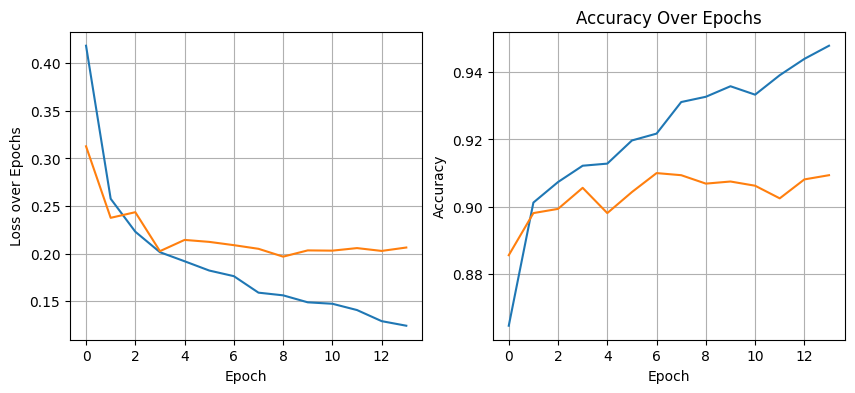

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.9153 - loss: 0.1831
128 nodes, dropout 0, lr 0.005, batch size 128


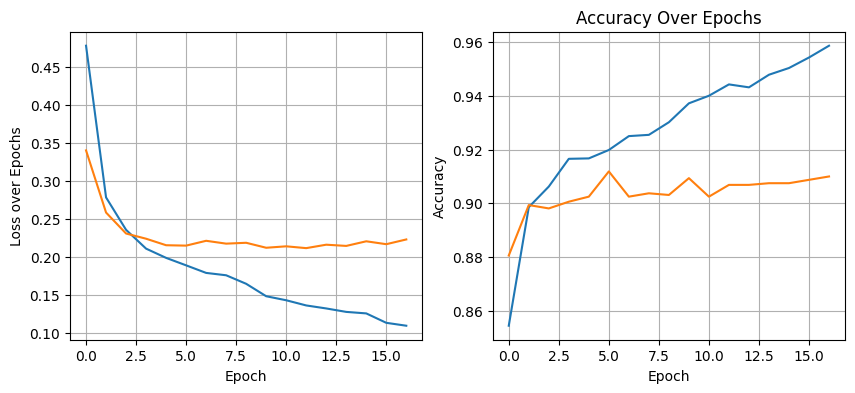

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.9221 - loss: 0.1876
128 nodes, dropout 0, lr 0.001, batch size 32


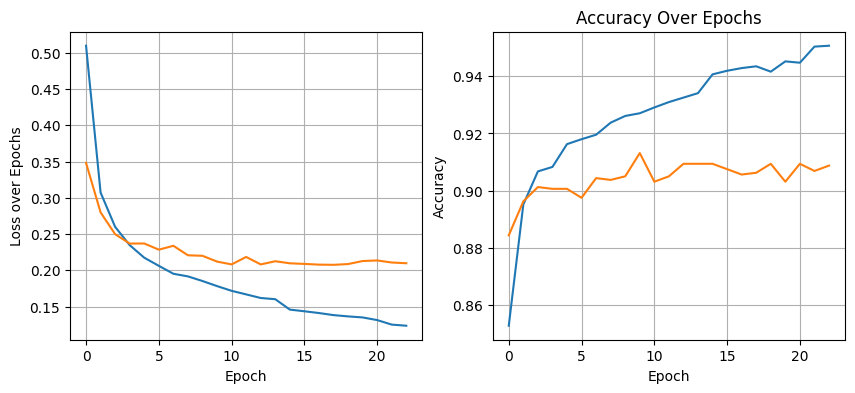

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.9186 - loss: 0.1914
128 nodes, dropout 0, lr 0.001, batch size 64


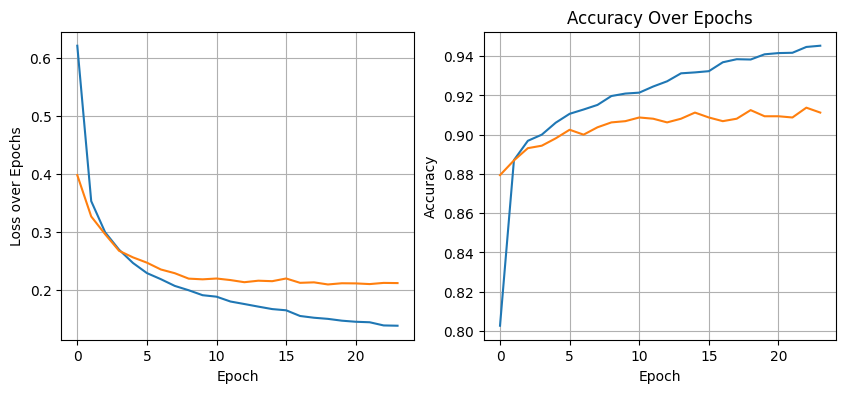

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.9160 - loss: 0.1885
128 nodes, dropout 0, lr 0.001, batch size 128


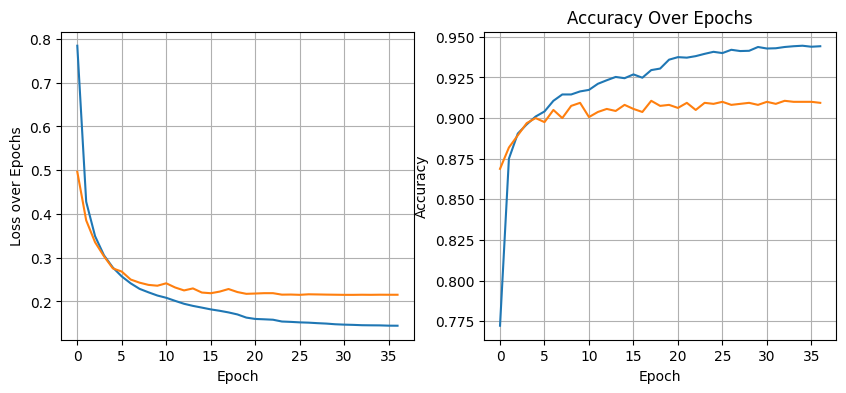

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.9147 - loss: 0.1973
128 nodes, dropout 0.2, lr 0.01, batch size 32


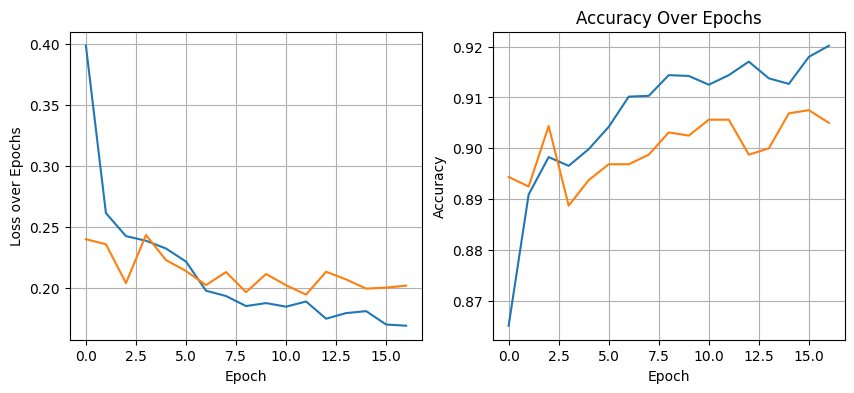

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.9127 - loss: 0.1749
128 nodes, dropout 0.2, lr 0.01, batch size 64


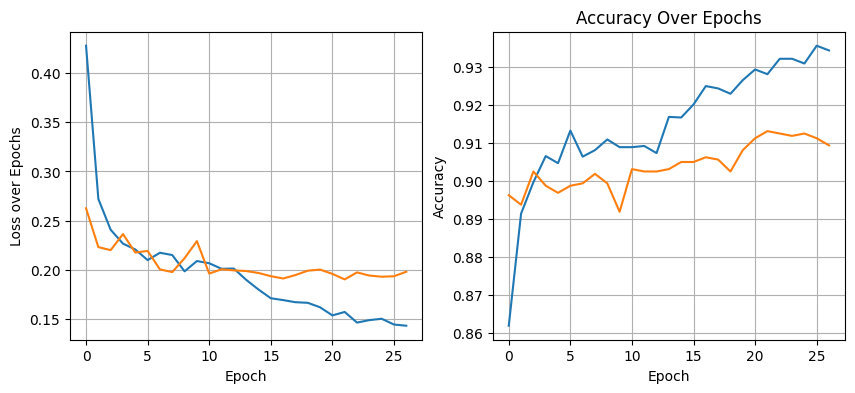

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.9130 - loss: 0.1768
128 nodes, dropout 0.2, lr 0.01, batch size 128


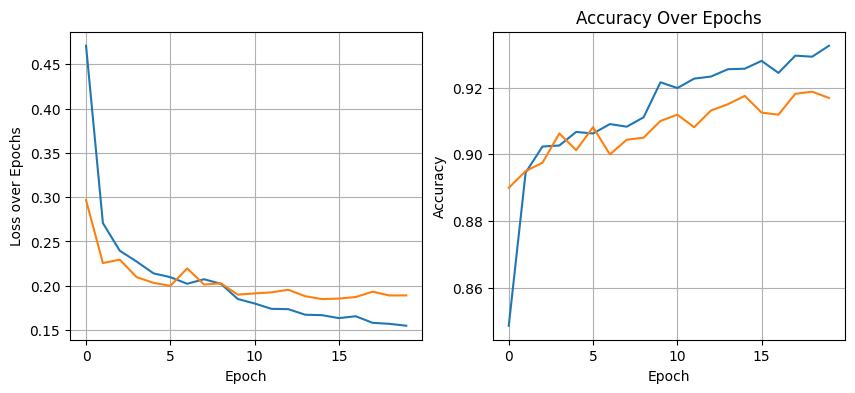

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.9201 - loss: 0.1742
128 nodes, dropout 0.2, lr 0.005, batch size 32


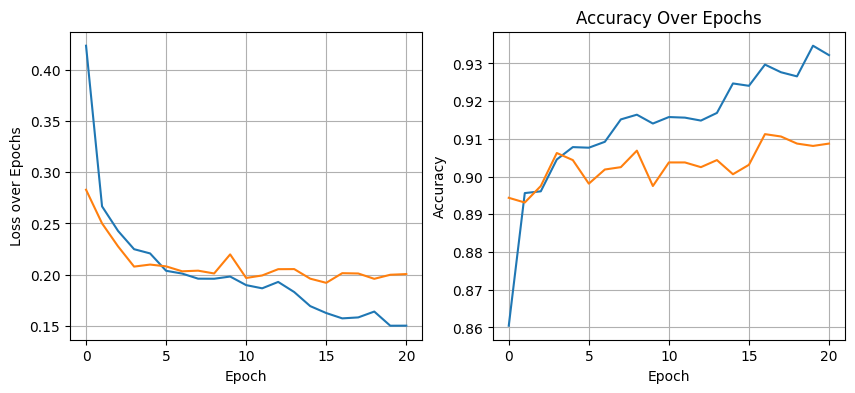

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.9202 - loss: 0.1839
128 nodes, dropout 0.2, lr 0.005, batch size 64


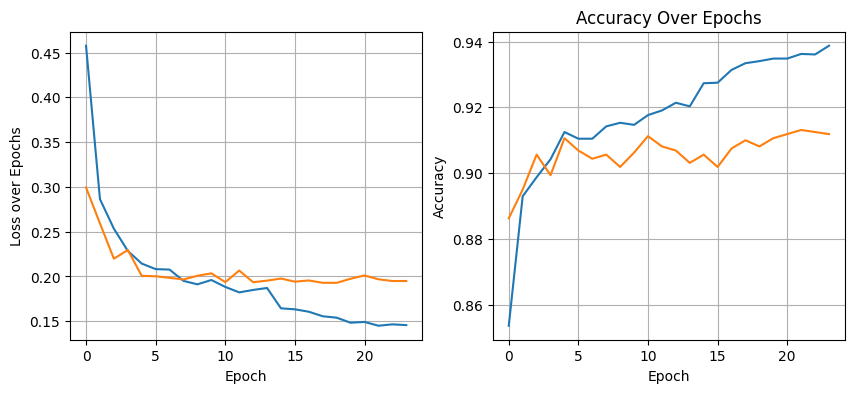

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.9223 - loss: 0.1747
128 nodes, dropout 0.2, lr 0.005, batch size 128


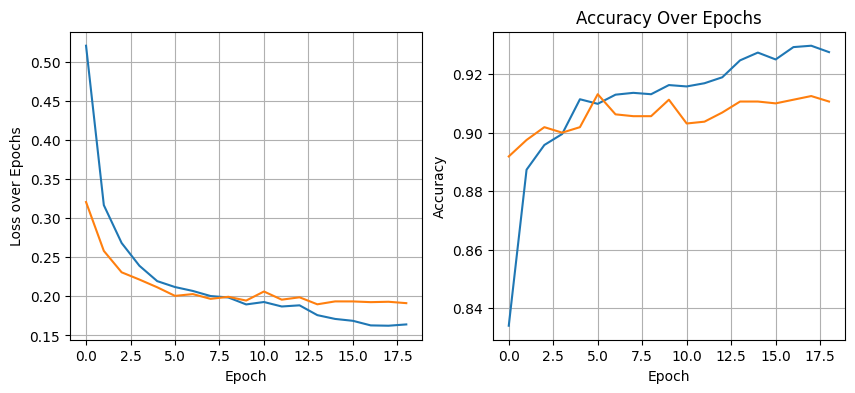

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.9187 - loss: 0.1746
128 nodes, dropout 0.2, lr 0.001, batch size 32


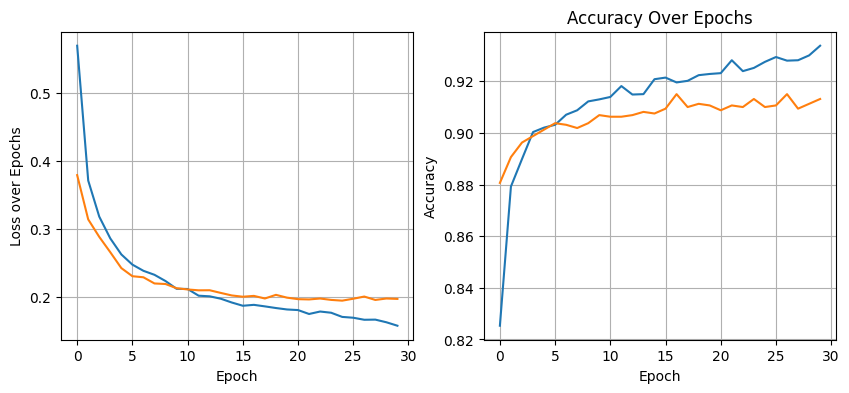

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.9205 - loss: 0.1770
128 nodes, dropout 0.2, lr 0.001, batch size 64


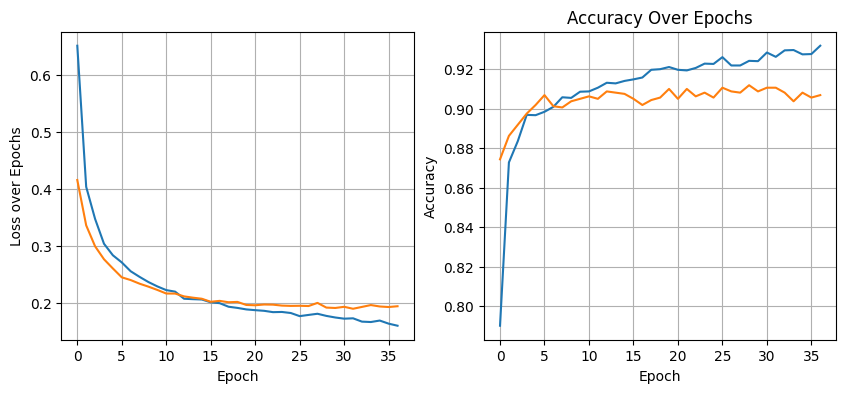

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.9180 - loss: 0.1781
128 nodes, dropout 0.2, lr 0.001, batch size 128


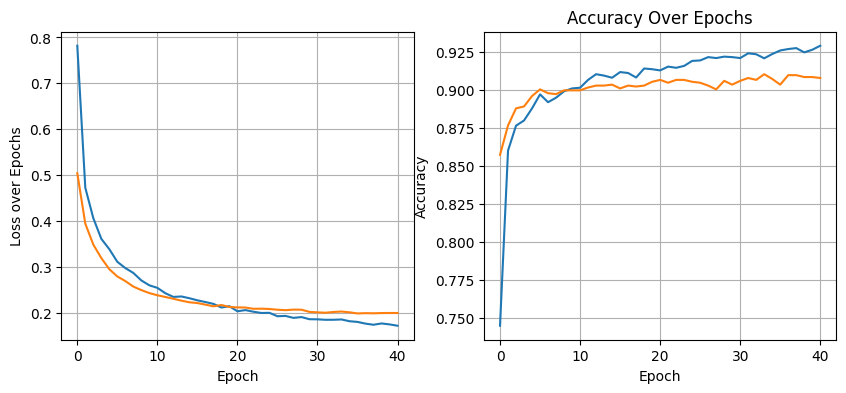

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.9187 - loss: 0.1776
256 nodes, dropout 0, lr 0.01, batch size 32


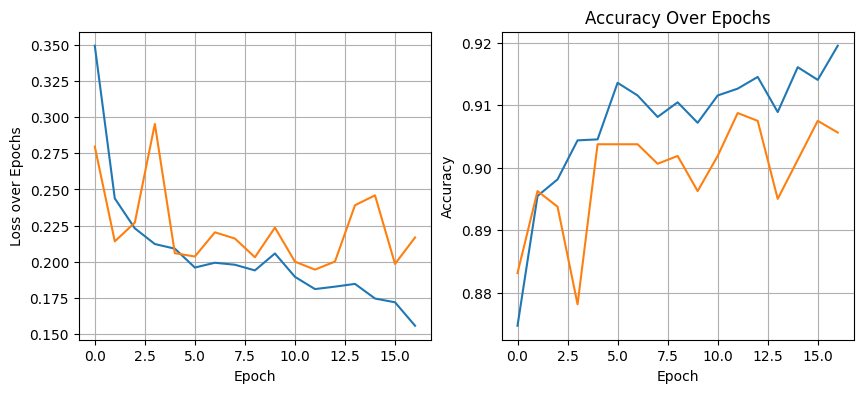

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.9121 - loss: 0.1739
256 nodes, dropout 0, lr 0.01, batch size 64


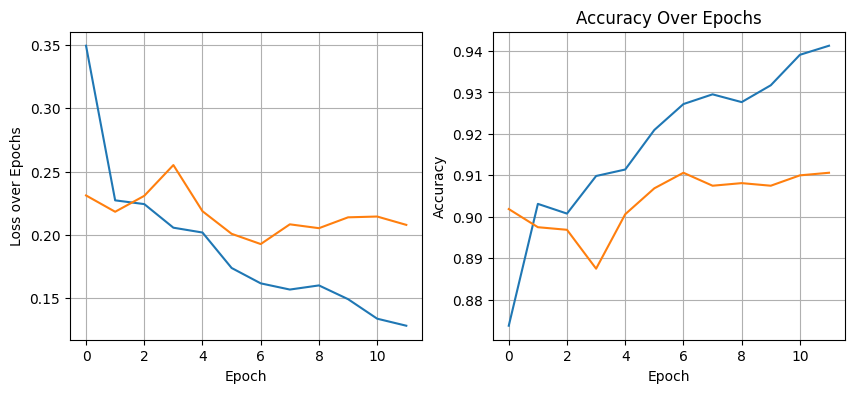

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.9099 - loss: 0.1787
256 nodes, dropout 0, lr 0.01, batch size 128


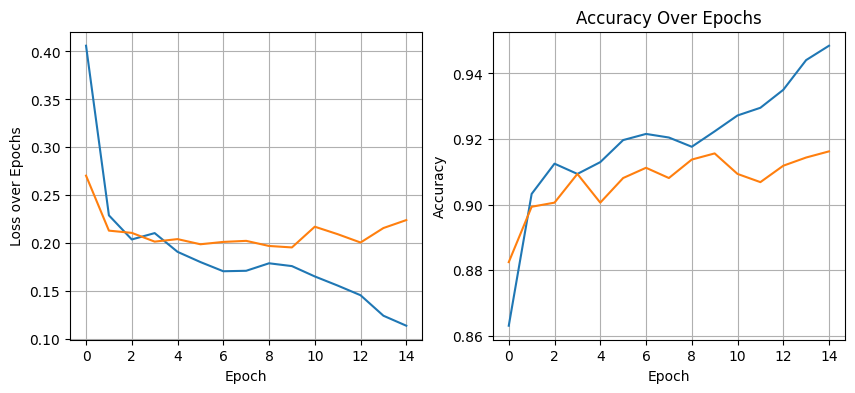

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9148 - loss: 0.1860
256 nodes, dropout 0, lr 0.005, batch size 32


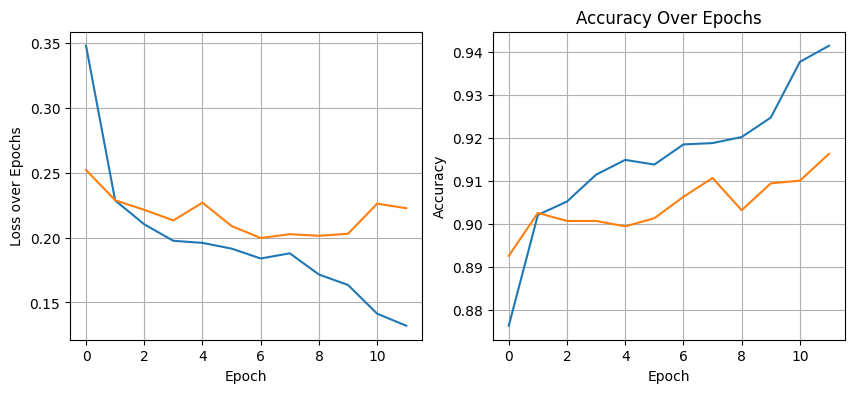

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.9108 - loss: 0.1861
256 nodes, dropout 0, lr 0.005, batch size 64


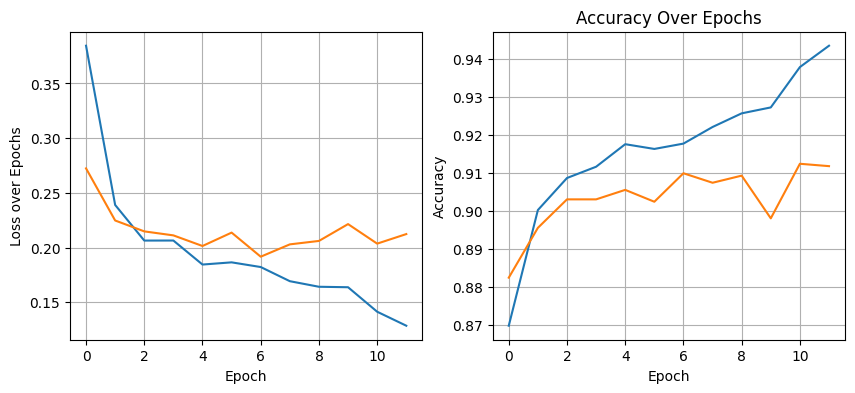

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.9176 - loss: 0.1832
256 nodes, dropout 0, lr 0.005, batch size 128


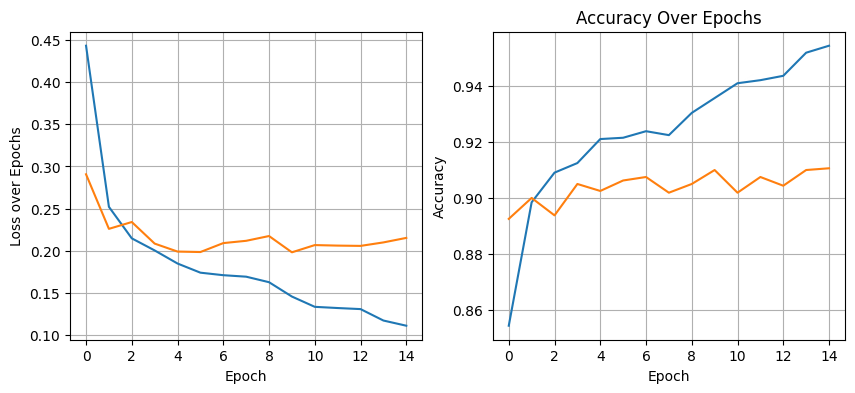

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.9198 - loss: 0.1861
256 nodes, dropout 0, lr 0.001, batch size 32


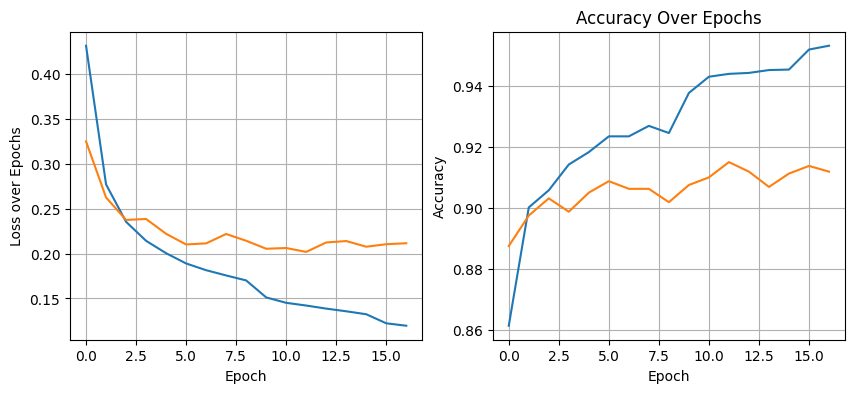

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.9198 - loss: 0.1815
256 nodes, dropout 0, lr 0.001, batch size 64


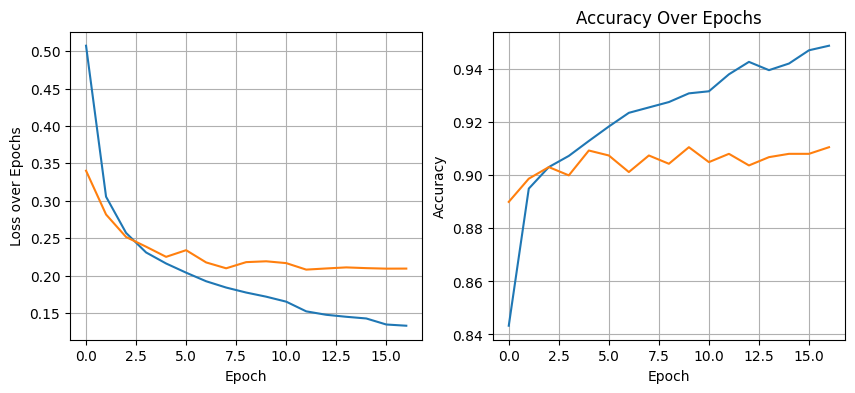

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.9224 - loss: 0.1892
256 nodes, dropout 0, lr 0.001, batch size 128


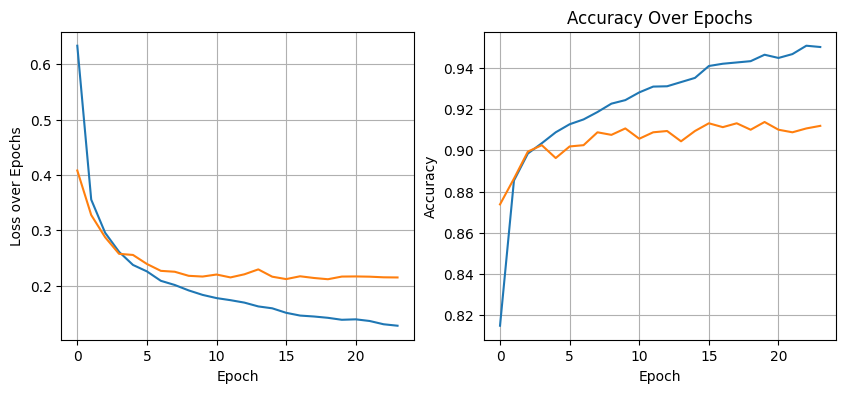

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.9141 - loss: 0.1964
256 nodes, dropout 0.2, lr 0.01, batch size 32


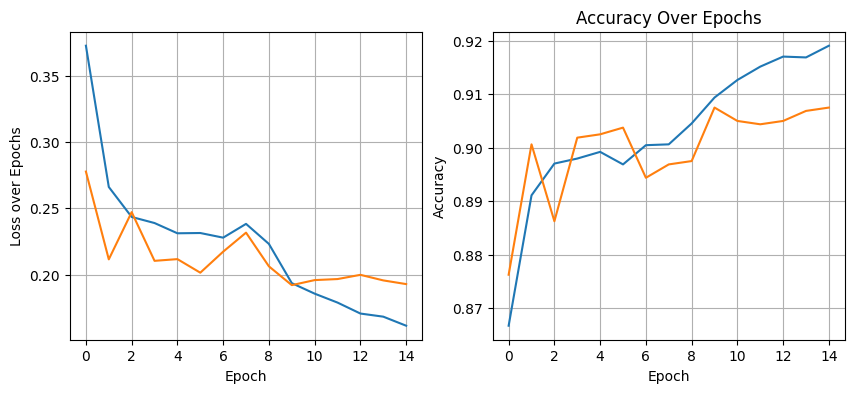

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.9110 - loss: 0.1780
256 nodes, dropout 0.2, lr 0.01, batch size 64


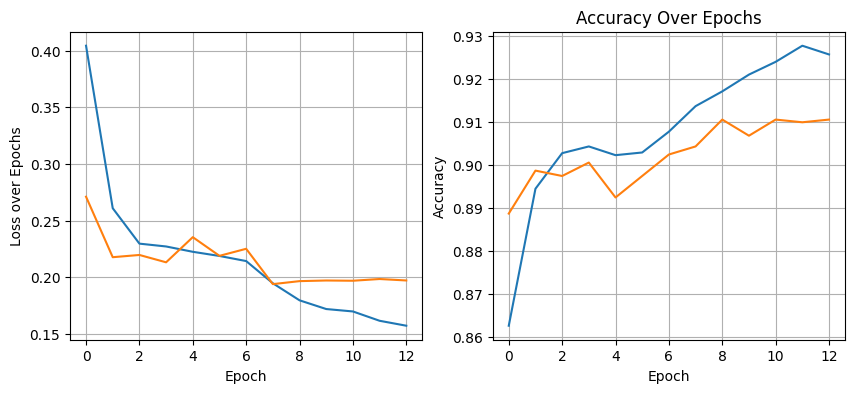

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.9150 - loss: 0.1747
256 nodes, dropout 0.2, lr 0.01, batch size 128


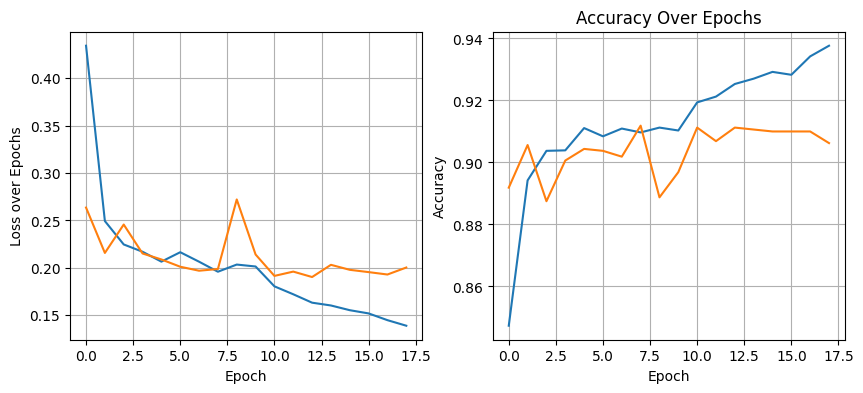

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.9155 - loss: 0.1820
256 nodes, dropout 0.2, lr 0.005, batch size 32


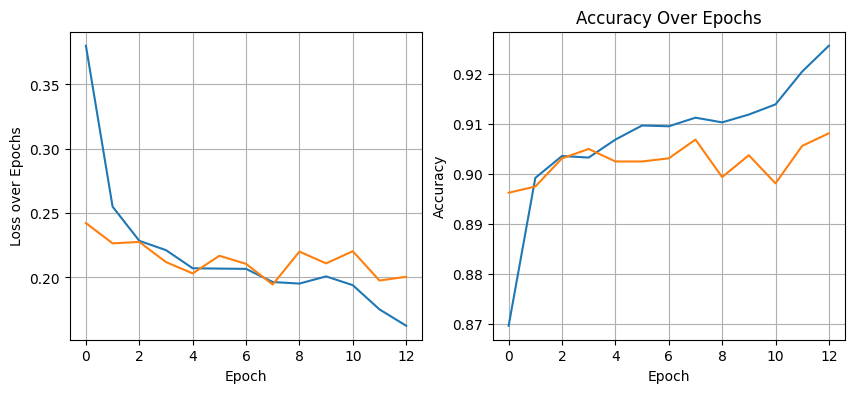

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.9186 - loss: 0.1811
256 nodes, dropout 0.2, lr 0.005, batch size 64


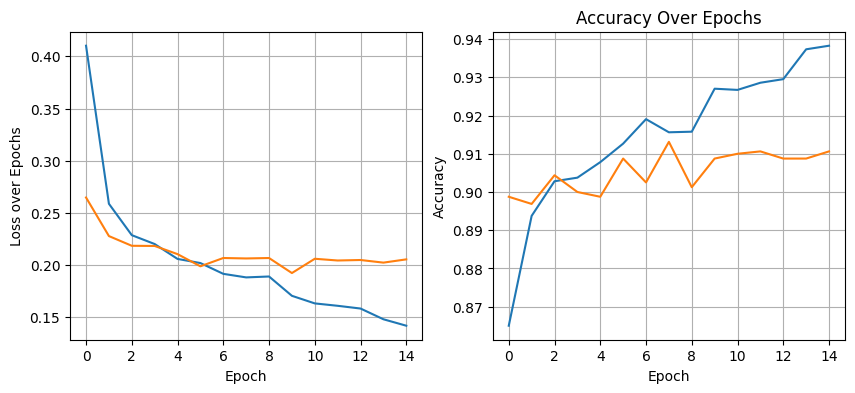

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.9128 - loss: 0.1786
256 nodes, dropout 0.2, lr 0.005, batch size 128


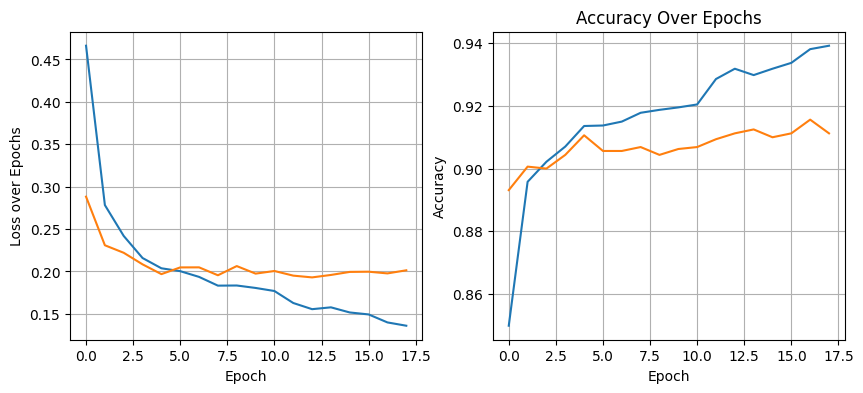

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9178 - loss: 0.1744
256 nodes, dropout 0.2, lr 0.001, batch size 32


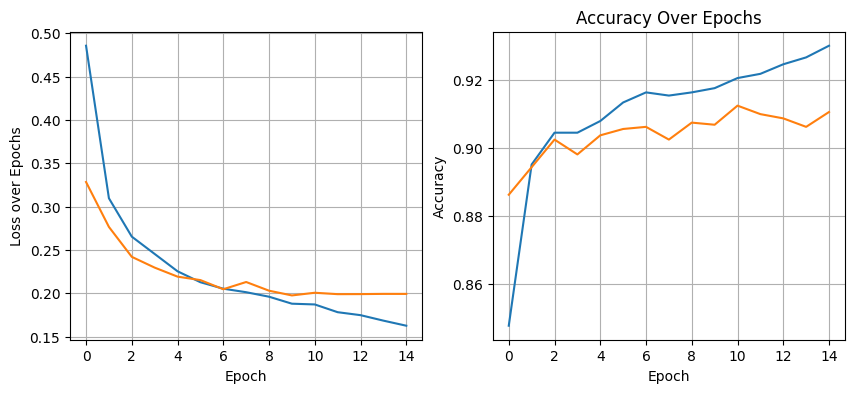

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.9234 - loss: 0.1787
256 nodes, dropout 0.2, lr 0.001, batch size 64


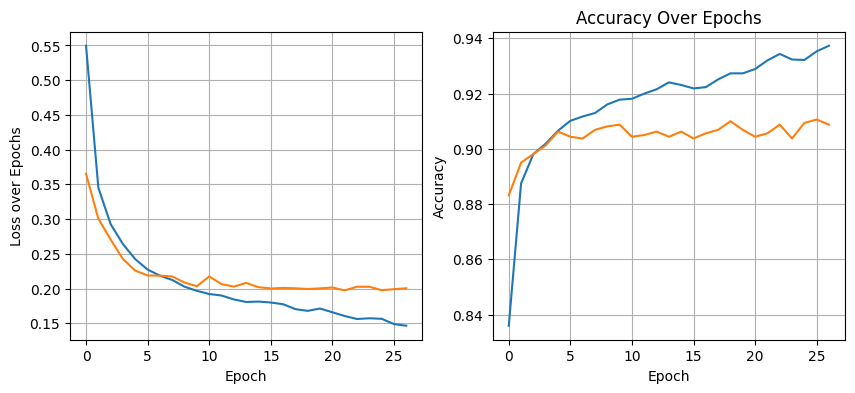

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.9195 - loss: 0.1770
256 nodes, dropout 0.2, lr 0.001, batch size 128


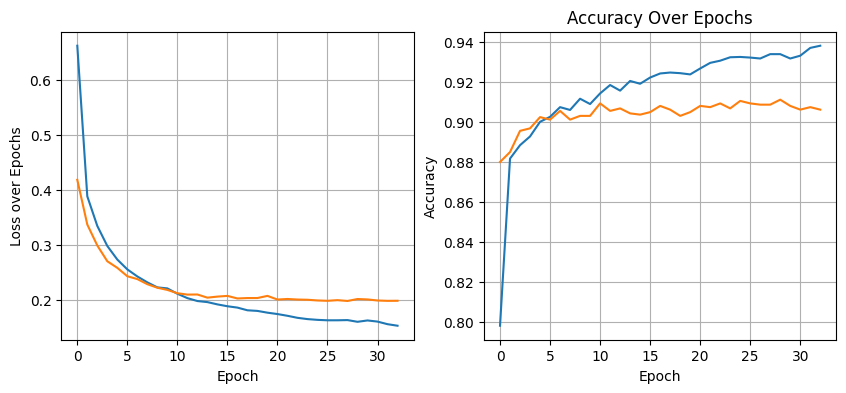

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.9180 - loss: 0.1814
512 nodes, dropout 0, lr 0.01, batch size 32


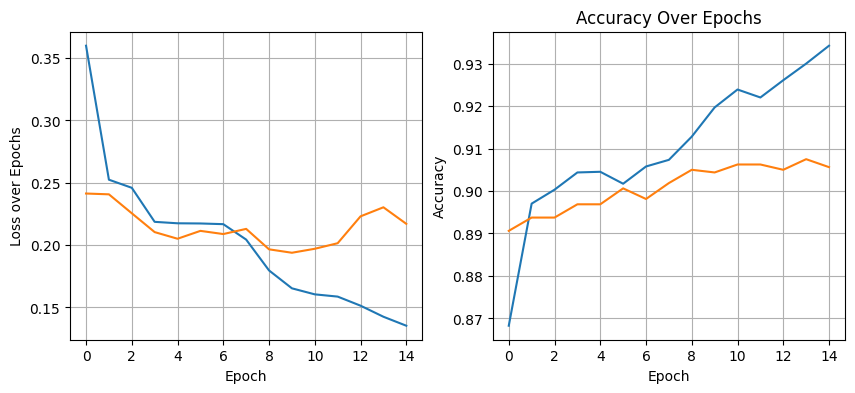

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9143 - loss: 0.1732
512 nodes, dropout 0, lr 0.01, batch size 64


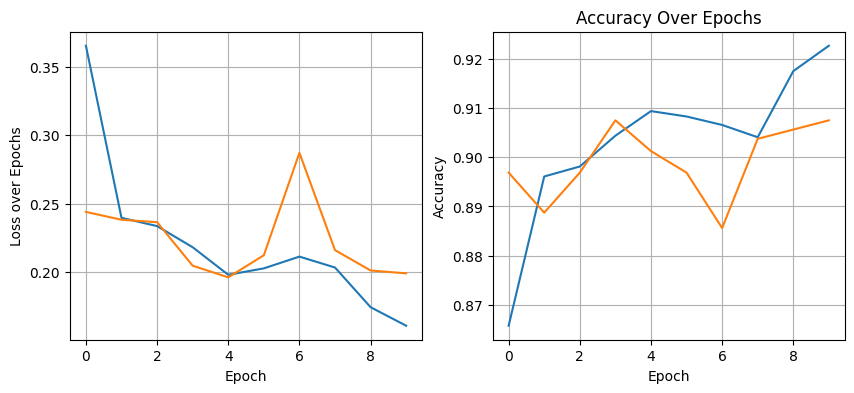

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9165 - loss: 0.1793
512 nodes, dropout 0, lr 0.01, batch size 128


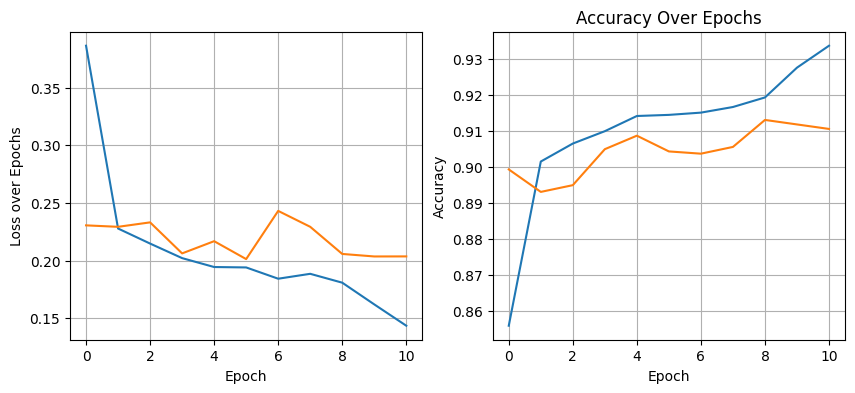

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.9106 - loss: 0.1825
512 nodes, dropout 0, lr 0.005, batch size 32


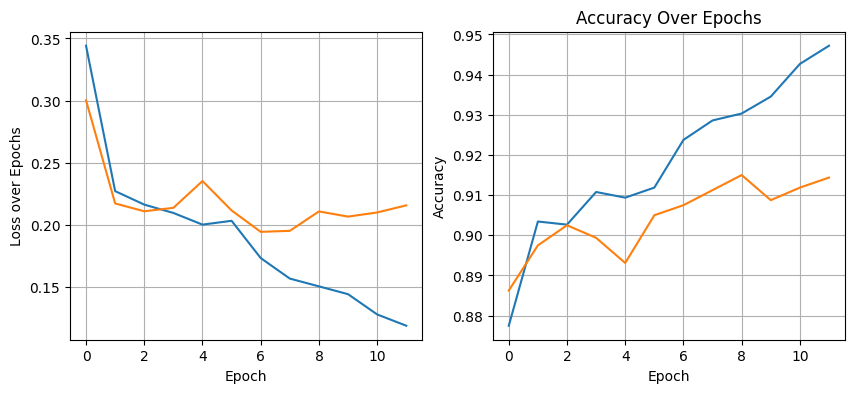

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.9126 - loss: 0.1796
512 nodes, dropout 0, lr 0.005, batch size 64


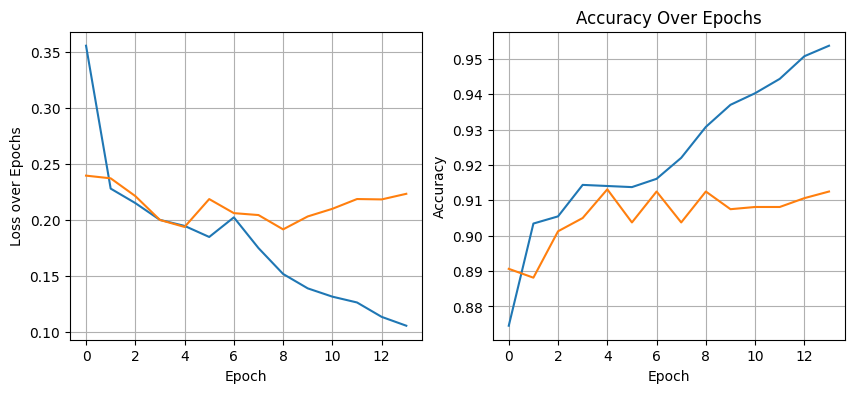

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.9092 - loss: 0.1846
512 nodes, dropout 0, lr 0.005, batch size 128


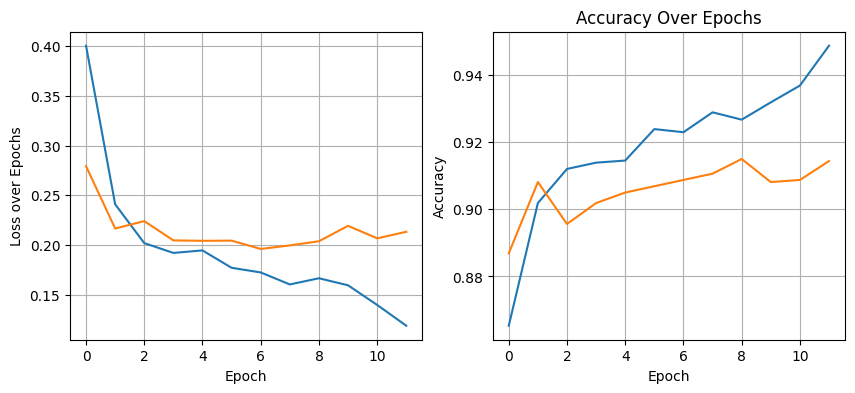

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.9234 - loss: 0.1777
512 nodes, dropout 0, lr 0.001, batch size 32


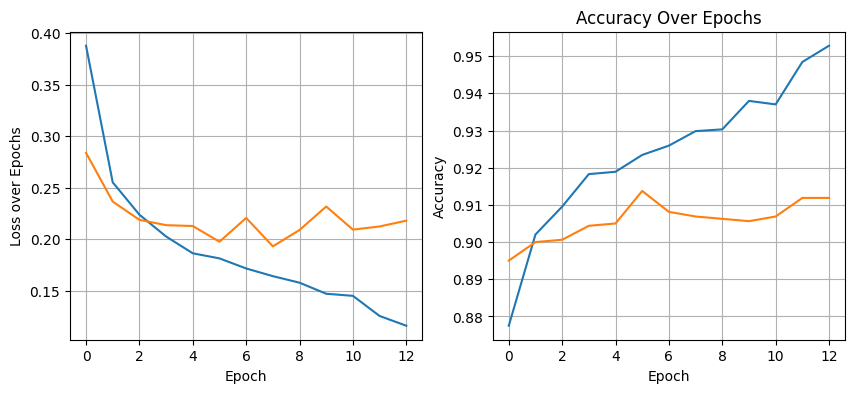

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.9175 - loss: 0.1803
512 nodes, dropout 0, lr 0.001, batch size 64


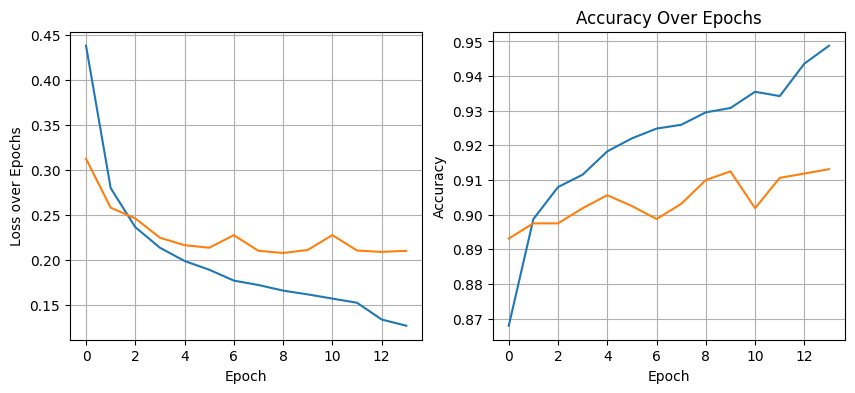

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9137 - loss: 0.1937
512 nodes, dropout 0, lr 0.001, batch size 128


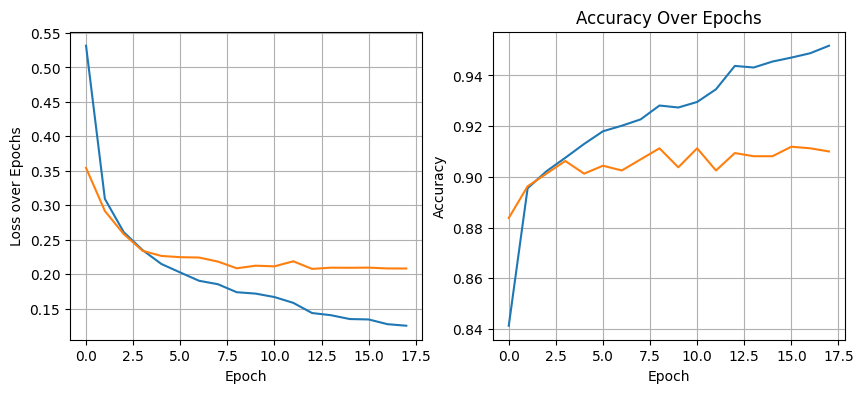

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.9222 - loss: 0.1907
512 nodes, dropout 0.2, lr 0.01, batch size 32


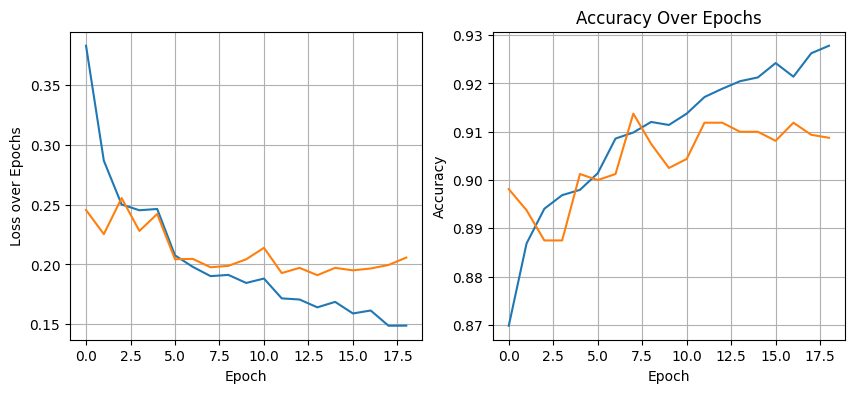

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.9129 - loss: 0.1919
512 nodes, dropout 0.2, lr 0.01, batch size 64


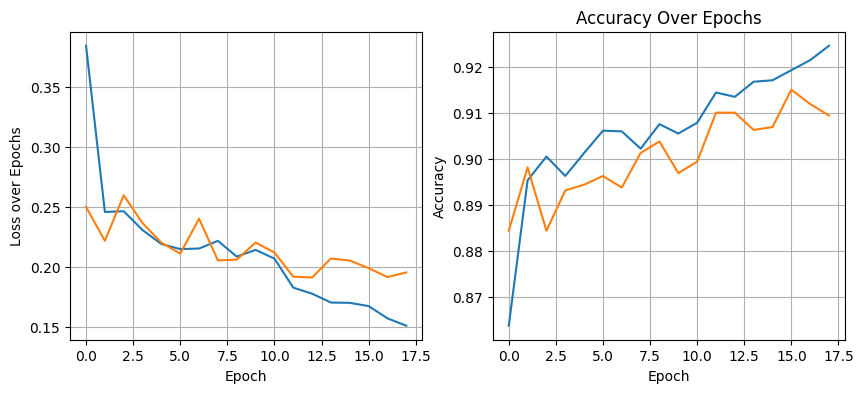

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.9130 - loss: 0.1661
512 nodes, dropout 0.2, lr 0.01, batch size 128


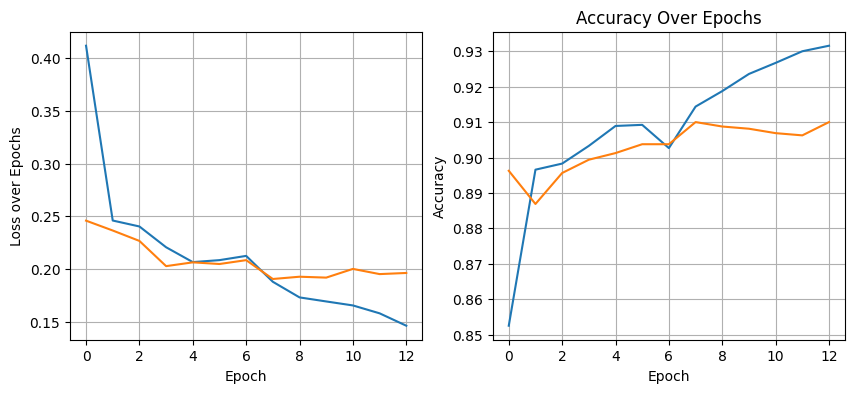

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.9100 - loss: 0.1786
512 nodes, dropout 0.2, lr 0.005, batch size 32


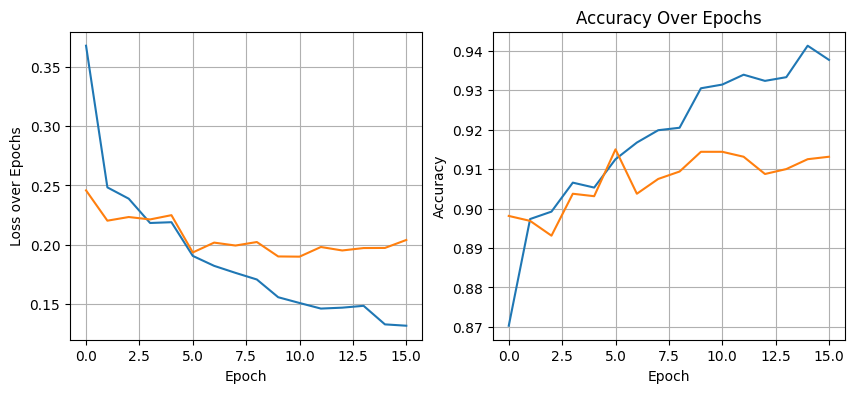

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.9231 - loss: 0.1814
512 nodes, dropout 0.2, lr 0.005, batch size 64


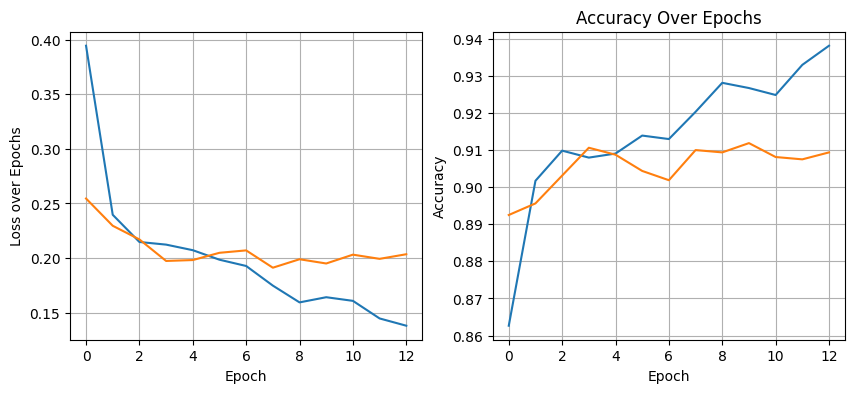

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.9190 - loss: 0.1757
512 nodes, dropout 0.2, lr 0.005, batch size 128


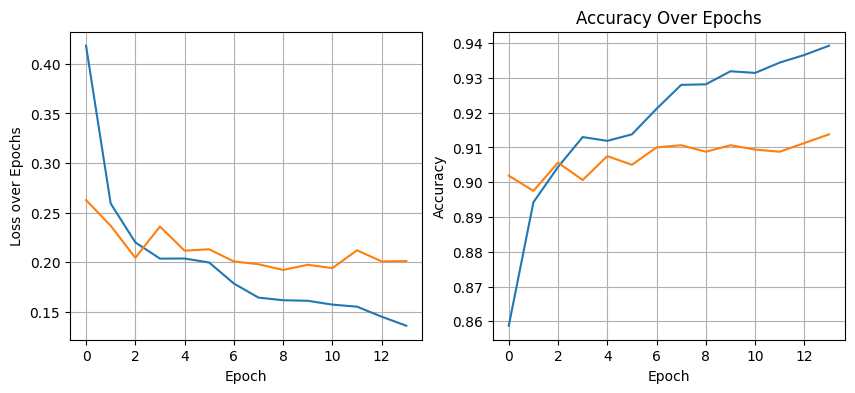

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.9221 - loss: 0.1757
512 nodes, dropout 0.2, lr 0.001, batch size 32


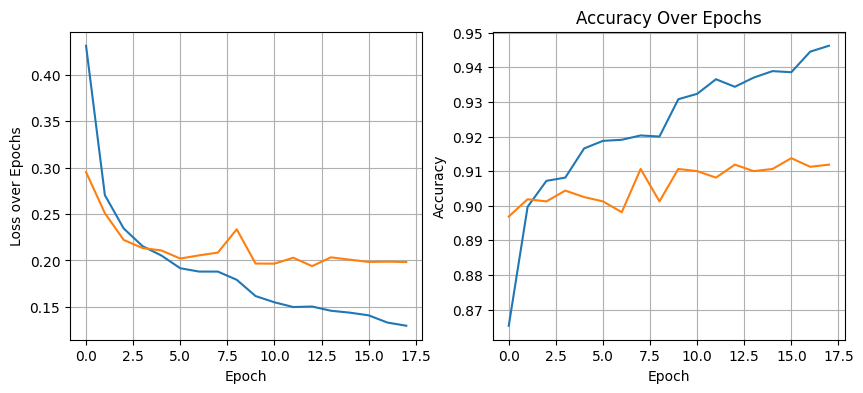

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.9181 - loss: 0.1826
512 nodes, dropout 0.2, lr 0.001, batch size 64


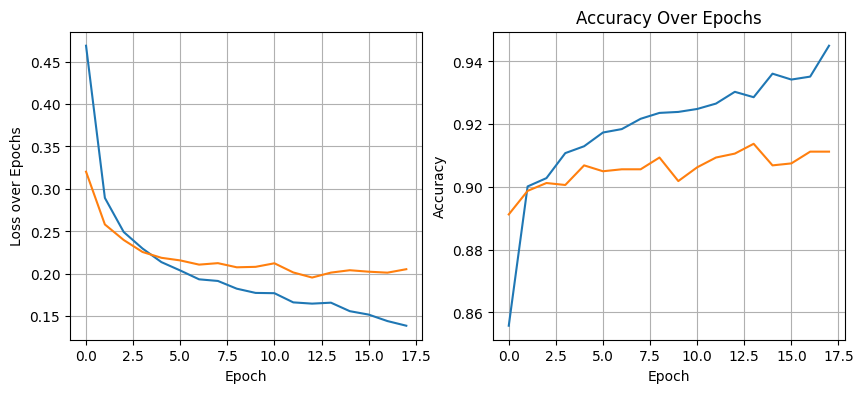

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.9224 - loss: 0.1840
512 nodes, dropout 0.2, lr 0.001, batch size 128


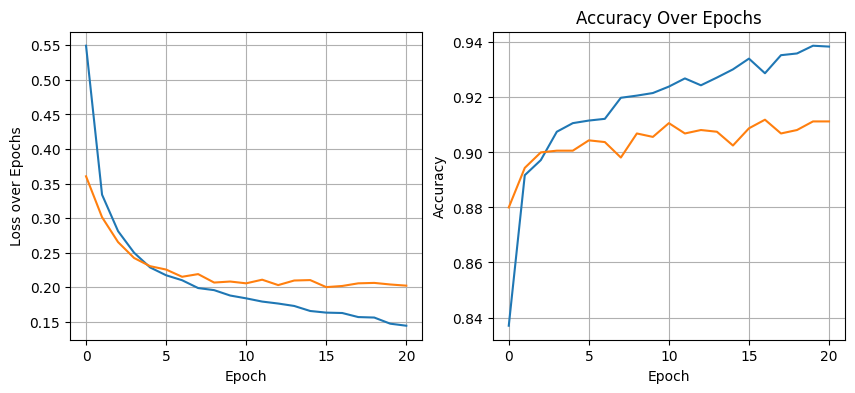

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.9171 - loss: 0.1922


In [68]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [128, 256, 512]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = trainModel(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plotHistory(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [69]:
y_pred = least_loss_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step


In [70]:
nn = classification_report(y_test, y_pred, digits=4)
models.append("Neural Networks")
classificationReports.append(nn)
print(nn)

              precision    recall  f1-score   support

           0     0.7904    0.9513    0.8635       678
           1     0.9542    0.8852    0.9184       636
           2     0.9823    0.9344    0.9577       655
           3     0.9705    0.8838    0.9251       671

    accuracy                         0.9140      2640
   macro avg     0.9244    0.9137    0.9162      2640
weighted avg     0.9233    0.9140    0.9158      2640



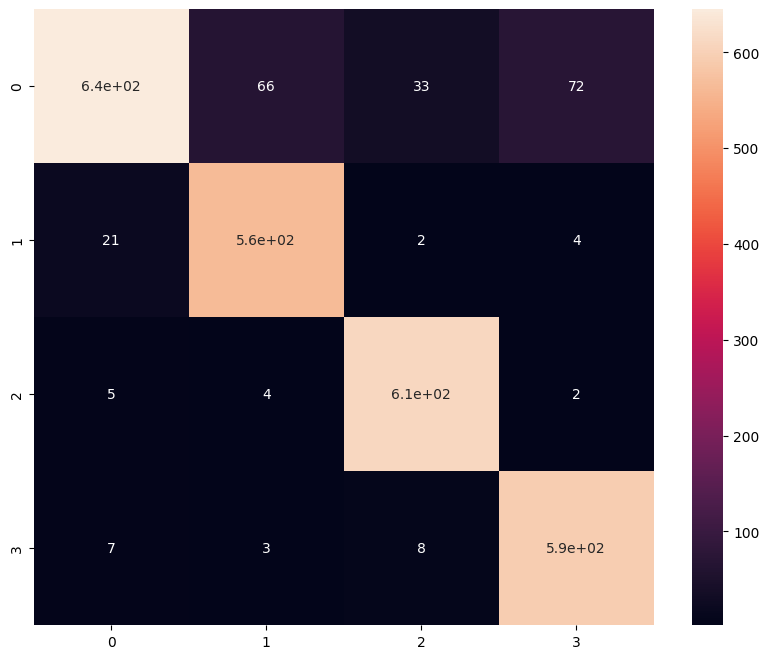

In [71]:
plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

## 5. Model Evaluation

In [74]:
for i in range(len(models)):
    accuracy = 0
    print(f"Model: {models[i]}")
    for line in classificationReports[i].splitlines():
        if 'accuracy' in line:
            accuracy = line.split()[-2]
            accuracy = float(accuracy)
            break
    print(f"Accuracy: {accuracy*100}%")
    print()

Model: Naive Bayes
Accuracy: 87.12%

Model: Logistic Regression
Accuracy: 86.06%

Model: Support Vector Machine
Accuracy: 91.7%

Model: Decision Tree
Accuracy: 90.42%

Model: XGBoost
Accuracy: 92.05%

Model: Random Forest Classifier
Accuracy: 91.74%

Model: Neural Networks
Accuracy: 91.4%



XGBoost model gives the best accuracy in predicting weather.